### Title: Earthquake statistics: frequency-magnitude

In a [previous blog post](https://www.nicolew.xyz/blog/2018/03/19/earthquake-statistics-when-and-how-many/), I looked at the number of earthquakes greater than magnitude 6 that occurred globally between 1983 and 2017, and how these events were distributed over different time intervals. While it is useful to look at general seismicity rates over certain time periods, it is also important to understand how the magnitudes of earthquakes are distributed. In other words, how frequently do big events happen compared to small ones? 

The data used for this post is described in more detail in the blog post linked above and was obtained from the [USGS Earthquake catalog](https://earthquake.usgs.gov/earthquakes/search/). Let's load in the data and get started.

In [1]:
# Load in the csv file of earthquakes M6 and greater
# globally from 1 January, 1970 (source: USGS)

import pandas as pd
import numpy as np

df = pd.read_csv('/home/nicole/seismology/stats/eq_1970_M6.csv')
print('Total number of earthquakes:',df.shape[0])
df.head()


Total number of earthquakes: 6714


,time,latitude,longitude,depth,mag,magType,place
0,2017-12-15T16:47:58.230Z,-7.4921,108.1743,90.0,6.5,mww,"1km E of Kampungbaru, Indonesia"
1,2017-12-13T18:03:43.920Z,-54.2189,2.1628,17.0,6.5,mww,"80km WNW of Bouvet Island, Bouvet Island"
2,2017-12-12T21:41:31.140Z,30.8275,57.2982,8.0,6.0,mww,"63km NNE of Kerman, Iran"
3,2017-12-12T08:43:18.320Z,30.7372,57.2795,12.0,6.0,mww,"53km NNE of Kerman, Iran"
4,2017-12-09T15:14:24.770Z,10.0928,140.2016,10.0,6.1,mww,"50km NW of Fais, Micronesia"


This dataset includes a total of 6714 events that are magnitude 6 and above from 1970 through the end of 2017. The information for each event includes the date and time, coordinates, depth (in km), magnitude, magnitude type, and place name. This analysis will focus on how many earthquakes occur at each magnitude.

### Earthquake magnitudes

We can see that each event has a magnitude and magnitude type. Let's take a brief detour into seismology and review what an earthquake magnitude measures and the magnitude types used most often by seismologists. 

The size of an earthquake can be represented in a number of ways, but the most common metric is to use the earthquake *magnitude*. An earthquake magnitude is determined by measuring the maximum amplitude of the recorded seismic waves on a seismogram (record of ground motion). All earthquake magnitude scales are logarithmic, with an increase of one magnitude corresponding to an increase in the recorded amplitude by a factor of ten. For example, a M 8 event would have a recorded amplitude 100 times greater than a M 6 event, on the same magnitude scale.

Because earthquakes large and small are recorded over a range of distances with instruments that have different responses to ground motion, there is a need for different magnitude scales. You can find a review of these magnitude scales [here](https://earthquake.usgs.gov/earthquakes/eventpage/terms.php), so I won't go into a lot of detail.

#### Moment magnitude
A newer magnitude scale that worked better for larger events was developed in the late 1970s and was calibrated to agree with other scales in use at the time. This scale is based on the moment of an earthquake, which is based on physical properties of the fault rupture that generates the earthquake. The moment magnitude scale is denoted by an Mw (also Mww, Mwc, Mwr, Mwb). A large percentage of earthquakes Mw > 5 are recorded using the moment magnitude scale.

Before we look at the number of earthquakes at different magnitudes, let's first take a look at the magnitude types that are present in our data set. We can also use this as an opportunity to make a stacked bar chart. Because, like bow ties, stacked bar charts are cool.

In [2]:
# List the magnitude types
df['magType'].value_counts()

mw     2128
mwc    1602
mww     957
mwb     919
ms      708
mb      379
ml       14
mh        3
mwr       2
md        2
Name: magType, dtype: int64

We have ten different magnitude types but only six of them are used frequently; let's use just the top six in the bar chart plot.

In [3]:
# Create an array of the top magnitudes to keep
# (will be used for plotting later)
mag_keep = np.asarray(df['magType'].value_counts().head(6).index)

# Change the type from 'object' to 'string'
mag_keep = mag_keep.astype(str)

### Plotting magnitude types

In [4]:
# Import stuff for plotting
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

# Settings for all figures
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 14

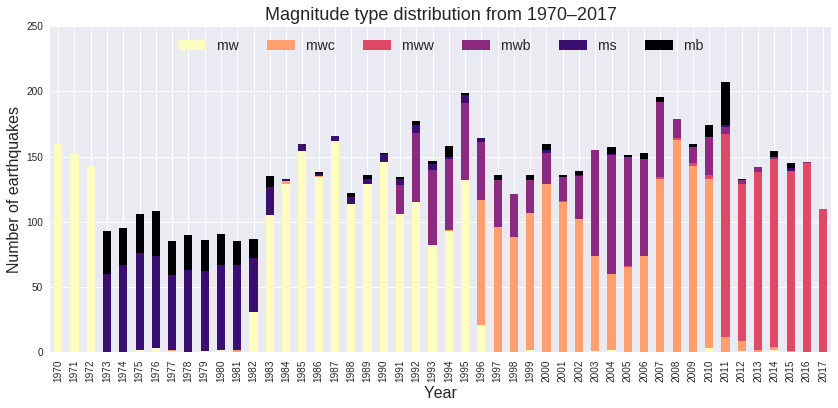

In [5]:
# Count the number of earthquakes for each year

# Import the datetime module
from datetime import datetime

# Create a datetime object column from
# the string time column using strptime
df['dt_time'] = df['time'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add an additional column for the year
df['year'] = df['dt_time'].apply(lambda x: x.year)

# Groupby year, then get counts for magnitude type
df_cut = df[['year', 'magType']]
df_magType = df_cut.groupby('year')['magType'].value_counts().unstack()

# Keep only the top 6 magnitude types for plotting
df_magType = df_magType[mag_keep]

# Plot the dataFrame as a stacked bar chart
ax = df_magType.plot(kind='bar', stacked=True, 
                     colormap='magma_r', figsize=(14,6))
ax.set_ylim([0, 250])
ax.legend(loc='upper center', ncol=6)
plt.xlabel('Year'), plt.ylabel('Number of earthquakes')
plt.title('Magnitude type distribution from 1970–2017')
plt.show()

From the chart, we can see that the moment magnitude scale was used consistently after about 1983. I don't know why there seems to be a switch back to *ms* and *mb* magnitudes from 1973 to about 1982. Possibly as a result of this switch, it looks like there might be missing events between 1973 and 1983. The *ms* and *mb* magnitude scales will generally give a lower magnitude compared to the moment magnitude scale, for the same event. Between 1973 and 1982, there may have been more events of *M* 6 and above if they had been recorded with the moment magnitude scale. Since there seems to be missing events for those years and the moment magnitude scale is not used consistently, we will cut out all events from before 1983.

In [6]:
# Cut out years 1970 - 1982
df = df[df.year > 1982]

# Print the minimum year in the column
print("Earliest year of data:",min(df['year']))

# Total number of earthquakes
N_tot = df['mag'].count()
print('Total number of earthquakes:', N_tot)

Earliest year of data: 1983
Total number of earthquakes: 5328


### Earthquake Magnitude

Earthquakes occur over a range of magnitudes, from very small ones of magnitude 1 (and even lower) to the largest events on Earth with magnitudes over 9. The largest earthquake in recorded history was the Mw 9.5 1960 [Valdivia earthquake](https://en.wikipedia.org/wiki/1960_Valdivia_earthquake). This event is thought to be an example of the maximum size of an earthquake; there are no areas on Earth with larger possible rupture areas or the ability to accumulate enough stress.

#### Earthquake magnitude distribution

The amount of energy released during an earthquake is proportional to the magnitude. For the moment magnitude scale, an increase of one magnitude corresponds to an energy increase by a factor of ~32. We know from observation that there are more smaller earthquakes than larger ones. Fortunately, the big damaging events don't happen fequently. Using our catalogue data, let' slook at this empirically.

Counting the number of events for each magnitude between 6.0 and 9.1 (in tenths) we can visualize the distribution of frequency with magnitude. Not all magnitudes are represented so we'll fill in a value of zero for those indices (magnitudes).


In [7]:
# Number of earthquakes by magnitude
mag_tot = df['mag'].value_counts()
mag_tot.sort_index(axis=0, inplace=True)

# Convert the indices of the Series to an np.ndarray
mags = np.asarray(mag_tot.index)

# Construct an array of the magnitudes 
# between 6.0 and 9.1 (step=0.1)
mags_all = np.linspace(6.0,9.1,num=32)

# Compare to find at what magnitudes earthquakes didn't occur 
# (find the set difference between the two arrays)
mags_miss = np.setxor1d(mags_all,mags)
print('Magnitudes with no earthquakes:', mags_miss)

# Add values for missing magnitudes
mag_add = pd.Series(data=np.zeros(len(mags_miss)), index = mags_miss)
mag_tot = pd.concat([mag_tot, mag_add])
mag_tot.sort_index(axis=0, inplace=True)

Magnitudes with no earthquakes: [ 8.5  8.7  8.9  9. ]


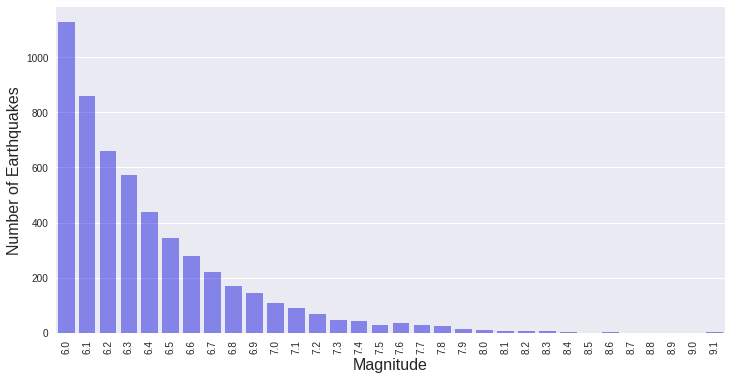

In [8]:
# Plot with all indices
plt.figure(figsize=(12,6))

sns.barplot(mag_tot.index, mag_tot.values, alpha=0.5, color='blue')
plt.xlabel('Magnitude'), plt.ylabel('Number of Earthquakes')
plt.xticks(rotation='vertical')
plt.show()

### Gutenberg&ndash;Richter law

Okay, so this is a nice power-law distribution. But, is this what is expected for earthquakes? Power-law distributions are ubiquituous in nature, from scaling in numerous biological system to the inverse-square laws of the gravitational and electrostatic forces. It shouldn't be a surprise that earthquake energy release also follows a power-law distribution.

In seismology, the relationship between the frequency of earthquake occurrence and the magnitudes of those events is known as the [Gutenberg&ndash;Richter law](https://en.wikipedia.org/wiki/Gutenberg%E2%80%93Richter_law). In a [paper published in 1956](http://resolver.caltech.edu/CaltechAUTHORS:20140731-150249818) by B. Gutenberg and C.F. Richter, the frequency of earthquake magnitudes was shown to follow a power-law scale. The paper focused on earthquakes in southern California but also included larger events worldwide.

The Gutenberg&ndash;Richter law is stated as  

$log_{10} N = a-bM$  

where $N$ is the cumulative number of earthquakes greater than magnitude $M$ and $a$ and $b$ are constants. The value for $a$ is determined by the total number of events, where $N_{tot} = 10^a$. The value of $b$ is a statistical measure of the ratio of small earthquakes to large earthquakes; if $b$ is large, small earthquakes are relatively more common and if $b$ is small, large earthquakes are more common. For earthquakes worldwide, $b$=1 because we are looking at the whole Earth and not a specific geologic setting or small catalog.

Using the Gutenberg&ndash;Richter law, we'll plot it along with the earthquake occurrence values plotted in the chart above. Because the G&ndash;R law is the cumulative number of events above a given magnitude, we first need to calculate a running total. 


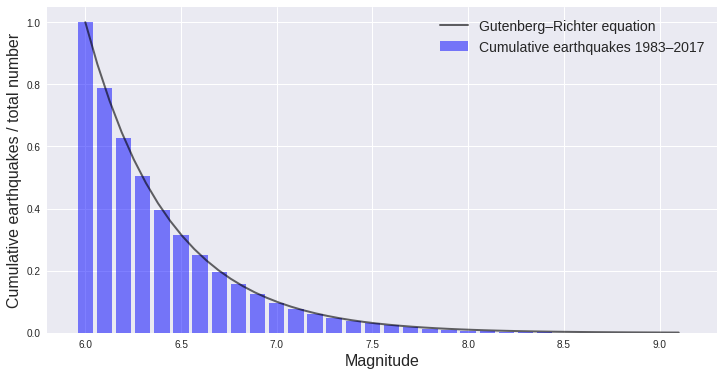

In [9]:
# Calculate the reverse running total 
#(i.e. all events above M6, then all above M6.1, etc.)
mag_Ntot = np.cumsum(mag_tot.values[::-1])[::-1]

# Plot Gutenberg-Richter relationship: N = 10**(a-bM)
a = np.log10(1)+6
M = np.linspace(6, 9.1)
N = np.power(10, (a-M))

plt.figure(figsize=(12,6))
ax1 = plt.bar(mag_tot.index, mag_Ntot/N_tot, 
              width=0.08, color='blue', alpha=0.5,
              label='Cumulative earthquakes 1983–2017')
ax2 = plt.plot(M, N, 'k', linewidth = 2, alpha=0.6,
         label='Gutenberg–Richter equation')
plt.ylabel('Cumulative earthquakes / total number')
plt.xlabel('Magnitude')
plt.legend()
plt.show()

### Don't Worry, b Happy

Using a value of $b$=1 gives an excellent fit to this data set, as expected for a catalogue of global earthquake events over many years. The b value for this dataset doesn't really tell us anything new, but for catalogues with different spatial or geographic characteristics, the b value can provide more valuable information. For example, if the fit drops off for small magnitudes, this can indicate that the catalogue is missing smaller events and is not complete.

### Summary

This purpose of this post was to explore the basics of the relationship between the frequency and magnitude of earthquakes occurring globally over a large time space. This was also a space for me to explore working with dataframes and pandas and attempting to make useful plots. 

The data set used in this analysis is available [here](https://github.com/nwhoffman/earthquake_stats/blob/master/eq_1970_M6.csv) and the Jupyter notebook is [here](https://github.com/nwhoffman/earthquake_stats/eq_stats2.ipynb).